# Building an SVM Classifier for MNIST with Hyperparameter Tuning and Comparative Analysis


In this notebook, we will:
1. Prepare the MNIST dataset 
2. Train a SVM classifier.
2. Use Grid and Random Search to optimize key hyperparameters
3. Compare the performance of the SVM with different kernels (Linear, Polynomial, and RBF) and select the best one based on test set accuracy and other metrics like precision, recall, and F1-score.
4. Compare the SVM classifier’s performance with your classifiers from Assignment 4, i.e KNN, SGD, and Random Forest. Pay attention to accuracy, precision, recall, and other evaluation metrics. Also, include training time (computational complexity) as evaluation metric.


# Prepare the MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separate features and labels
X, y = mnist['data'], mnist['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# Train three SVM Classifier on the MNIST Dataset

In [3]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC()

# Use Grid/Random Search with Cross-Validation to find the best hyperparameter values for the SVM classifier

## Random Search

### Linear

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal, randint

# randint(low=4, high=12),
# reciprocal(20, 100)
# uniform(0.1, 0.9)

# Hyperparameters random to search
linear_svm_param_random = {
    'kernel': ['linear'],
    'C': uniform(0.0001, 1),
}

# Train the linear SVM model using random search
linear_kernel_svm_random_search = RandomizedSearchCV(
    svm_clf,
    linear_svm_param_random,
    cv=3,
    verbose=3,
    n_iter=10,
    n_jobs=1,
    random_state=42)
linear_kernel_svm_random_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=0.3746401188473625, kernel=linear;, score=0.911 total time=  52.2s
[CV 2/3] END C=0.3746401188473625, kernel=linear;, score=0.904 total time=  52.3s
[CV 3/3] END C=0.3746401188473625, kernel=linear;, score=0.910 total time=  52.6s
[CV 1/3] END C=0.9508143064099162, kernel=linear;, score=0.911 total time=  52.3s
[CV 2/3] END C=0.9508143064099162, kernel=linear;, score=0.904 total time=  53.0s
[CV 3/3] END C=0.9508143064099162, kernel=linear;, score=0.910 total time=  51.8s
[CV 1/3] END C=0.7320939418114051, kernel=linear;, score=0.911 total time=  52.9s
[CV 2/3] END C=0.7320939418114051, kernel=linear;, score=0.904 total time=  52.3s
[CV 3/3] END C=0.7320939418114051, kernel=linear;, score=0.910 total time=  52.7s
[CV 1/3] END C=0.5987584841970366, kernel=linear;, score=0.911 total time=  52.4s
[CV 2/3] END C=0.5987584841970366, kernel=linear;, score=0.904 total time=  52.1s
[CV 3/3] END C=0.5987584841970366, ke

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B25776AC00>,
                                        'kernel': ['linear']},
                   random_state=42, verbose=3)

In [21]:
linear_kernel_svm_random_search.best_params_

{'C': np.float64(0.3746401188473625), 'kernel': 'linear'}

In [22]:
best_linear_svm = linear_kernel_svm_random_search.best_estimator_

In [23]:
import joblib

# Save the best linear SVM model
joblib.dump(best_linear_svm, 'best_linear_svm_model_random.pkl')

# Save the RandomizedSearchCV object
joblib.dump(linear_kernel_svm_random_search, 'random_search_linear_svm.pkl')

['random_search_linear_svm.pkl']

### Polynomial

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal, randint

# Hyperparameters random to search
poly_svm_param_random = {
    'kernel': ['poly'],
    'C': uniform(0.1, 100),
    'degree': randint(low=1, high=10),
    'coef0': uniform(0, 5)
}

# Train the poly SVM model using random search
poly_kernel_svm_random_search = RandomizedSearchCV(
    svm_clf,
    poly_svm_param_random,
    cv=3,
    verbose=3,
    n_iter=20,
    n_jobs=1,
    random_state=42)
poly_kernel_svm_random_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=37.55401188473625, coef0=4.75357153204958, degree=8, kernel=poly;, score=0.970 total time=  53.5s
[CV 2/3] END C=37.55401188473625, coef0=4.75357153204958, degree=8, kernel=poly;, score=0.967 total time=  54.4s
[CV 3/3] END C=37.55401188473625, coef0=4.75357153204958, degree=8, kernel=poly;, score=0.969 total time=  53.8s
[CV 1/3] END C=59.96584841970366, coef0=0.7800932022121826, degree=3, kernel=poly;, score=0.971 total time=  52.9s
[CV 2/3] END C=59.96584841970366, coef0=0.7800932022121826, degree=3, kernel=poly;, score=0.970 total time=  54.3s
[CV 3/3] END C=59.96584841970366, coef0=0.7800932022121826, degree=3, kernel=poly;, score=0.971 total time=  53.8s
[CV 1/3] END C=10.097491581800288, coef0=2.2962444598293357, degree=5, kernel=poly;, score=0.970 total time=  53.9s
[CV 2/3] END C=10.097491581800288, coef0=2.2962444598293357, degree=5, kernel=poly;, score=0.968 total time=  53.5s
[CV 3/3] END C=10.09749

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20, n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000292FD340DD0>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029287758E60>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000292887AAED0>,
                                        'kernel': ['poly']},
                   random_state=42, verbose=3)

In [9]:
poly_kernel_svm_random_search.best_params_

{'C': np.float64(57.14439744053994),
 'coef0': np.float64(2.6041713001291185),
 'degree': 8,
 'kernel': 'poly'}

In [10]:
best_poly_svm = poly_kernel_svm_random_search.best_estimator_

In [11]:
# Save the best linear SVM model
joblib.dump(best_poly_svm, 'best_poly_svm_model_random.pkl')

# Save the RandomizedSearchCV object
joblib.dump(poly_kernel_svm_random_search, 'random_search_poly_svm.pkl')

['random_search_poly_svm.pkl']

### RBF

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal, randint

# Hyperparameters random to search
rbf_svm_param_random = {
    'kernel': ['rbf'],
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto']
}

# Train the rbf SVM model using random search
rbf_kernel_svm_random_search = RandomizedSearchCV(
    svm_clf,
    rbf_svm_param_random,
    cv=3,
    verbose=3,
    n_iter=10,
    n_jobs=1,
    random_state=42)
rbf_kernel_svm_random_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=37.55401188473625, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 2/3] END C=37.55401188473625, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 3/3] END C=37.55401188473625, gamma=scale, kernel=rbf;, score=0.974 total time= 1.4min
[CV 1/3] END C=18.44347898661638, gamma=auto, kernel=rbf;, score=0.114 total time=10.8min
[CV 2/3] END C=18.44347898661638, gamma=auto, kernel=rbf;, score=0.114 total time=11.0min
[CV 3/3] END C=18.44347898661638, gamma=auto, kernel=rbf;, score=0.114 total time=11.0min
[CV 1/3] END C=59.96584841970366, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 2/3] END C=59.96584841970366, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 3/3] END C=59.96584841970366, gamma=scale, kernel=rbf;, score=0.974 total time= 1.4min
[CV 1/3] END C=44.683275285359116, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 2/3] END C=44.6832752853591

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000195F1AFC860>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, verbose=3)

In [43]:
rbf_kernel_svm_random_search.best_params_

{'C': np.float64(37.55401188473625), 'gamma': 'scale', 'kernel': 'rbf'}

In [44]:
best_rbf_svm = rbf_kernel_svm_random_search.best_estimator_

In [45]:
# Save the best linear SVM model
joblib.dump(best_rbf_svm, 'best_rbf_svm_model_random.pkl')

# Save the RandomizedSearchCV object
joblib.dump(rbf_kernel_svm_random_search, 'random_search_rbf_svm.pkl')

['random_search_rbf_svm.pkl']

## Grid Search

### Linear

In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
linear_svm_param_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.1],
}

# Train the linear SVM model using grid search
linear_kernel_svm_grid_search = GridSearchCV(
    svm_clf,
    linear_svm_param_grid,
    cv=3,
    verbose=3,
    n_jobs=1)
linear_kernel_svm_grid_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ............C=0.001, kernel=linear;, score=0.911 total time=  52.2s
[CV 2/3] END ............C=0.001, kernel=linear;, score=0.904 total time=  52.9s
[CV 3/3] END ............C=0.001, kernel=linear;, score=0.910 total time=  52.4s
[CV 1/3] END ..............C=0.1, kernel=linear;, score=0.911 total time=  53.1s
[CV 2/3] END ..............C=0.1, kernel=linear;, score=0.904 total time=  52.1s
[CV 3/3] END ..............C=0.1, kernel=linear;, score=0.910 total time=  51.5s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.001, 0.1], 'kernel': ['linear']}, verbose=3)

In [21]:
linear_kernel_svm_grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [22]:
linear_kernel_svm_grid_search.best_score_

np.float64(0.9084)

In [23]:
best_linear_svm_grid = linear_kernel_svm_grid_search.best_estimator_

In [24]:
from sklearn.metrics import accuracy_score

y_pred = best_linear_svm_grid.predict(X_train)
accuracy_score(y_train, y_pred)

0.9530333333333333

In [25]:
import joblib

# Save the best linear SVM model
joblib.dump(best_linear_svm_grid, 'best_linear_svm_model_grid.pkl')

# Save the RandomizedSearchCV object
joblib.dump(linear_kernel_svm_grid_search, 'grid_search_linear_svm.pkl')

['grid_search_linear_svm.pkl']

### Polynomial

In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
poly_svm_param_grid = {
    'kernel': ['poly'],
    'C': [45, 50, 55, 60],
    'degree': [7, 8, 9],
    'coef0': [2, 3, 4]
}

# Train the poly SVM model using grid search
poly_kernel_svm_grid_search = GridSearchCV(
    svm_clf,
    poly_svm_param_grid,
    cv=3,
    verbose=3,
    n_jobs=1)
poly_kernel_svm_grid_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END C=45, coef0=2, degree=7, kernel=poly;, score=0.971 total time= 1.2min
[CV 2/3] END C=45, coef0=2, degree=7, kernel=poly;, score=0.970 total time=  52.8s
[CV 3/3] END C=45, coef0=2, degree=7, kernel=poly;, score=0.971 total time=  53.7s
[CV 1/3] END C=45, coef0=2, degree=8, kernel=poly;, score=0.971 total time=  53.3s
[CV 2/3] END C=45, coef0=2, degree=8, kernel=poly;, score=0.970 total time=  53.4s
[CV 3/3] END C=45, coef0=2, degree=8, kernel=poly;, score=0.970 total time=  54.3s
[CV 1/3] END C=45, coef0=2, degree=9, kernel=poly;, score=0.971 total time= 1.2min
[CV 2/3] END C=45, coef0=2, degree=9, kernel=poly;, score=0.969 total time=  56.8s
[CV 3/3] END C=45, coef0=2, degree=9, kernel=poly;, score=0.969 total time=  59.0s
[CV 1/3] END C=45, coef0=3, degree=7, kernel=poly;, score=0.970 total time=  52.7s
[CV 2/3] END C=45, coef0=3, degree=7, kernel=poly;, score=0.969 total time=  52.6s
[CV 3/3] END C=45, coef0=

C:\Users\mase0051\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [45, 50, 55, 60], 'coef0': [2, 3, 4],
                         'degree': [7, 8, 9], 'kernel': ['poly']},
             verbose=3)

In [13]:
poly_kernel_svm_grid_search.best_params_

{'C': 45, 'coef0': 2, 'degree': 7, 'kernel': 'poly'}

In [14]:
poly_kernel_svm_grid_search.best_score_

np.float64(0.9705333333333334)

In [15]:
best_poly_svm_grid = poly_kernel_svm_grid_search.best_estimator_

In [16]:
from sklearn.metrics import accuracy_score

y_pred = best_poly_svm_grid.predict(X_train)
accuracy_score(y_train, y_pred)

0.9866666666666667

In [17]:
import joblib

# Save the best linear SVM model
joblib.dump(best_poly_svm_grid, 'best_poly_svm_model_grid.pkl')

# Save the RandomizedSearchCV object
joblib.dump(poly_kernel_svm_grid_search, 'grid_search_poly_svm.pkl')

['grid_search_poly_svm.pkl']

### RBF

In [4]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
rbf_svm_param_grid = {
    'kernel': ['rbf'],
    'C': [30, 35, 40, 45, 50],
    'gamma': ['scale']
}

# Train the rbf SVM model using grid search
rbf_kernel_svm_grid_search = GridSearchCV(
    svm_clf,
    rbf_svm_param_grid,
    cv=3,
    verbose=3,
    n_jobs=1)
rbf_kernel_svm_grid_search.fit(X_train[:30000], y_train[:30000])


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....C=30, gamma=scale, kernel=rbf;, score=0.976 total time= 1.5min
[CV 2/3] END .....C=30, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 3/3] END .....C=30, gamma=scale, kernel=rbf;, score=0.974 total time= 1.4min
[CV 1/3] END .....C=35, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 2/3] END .....C=35, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 3/3] END .....C=35, gamma=scale, kernel=rbf;, score=0.974 total time= 1.4min
[CV 1/3] END .....C=40, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 2/3] END .....C=40, gamma=scale, kernel=rbf;, score=0.976 total time= 1.5min
[CV 3/3] END .....C=40, gamma=scale, kernel=rbf;, score=0.974 total time= 1.4min
[CV 1/3] END .....C=45, gamma=scale, kernel=rbf;, score=0.976 total time= 1.5min
[CV 2/3] END .....C=45, gamma=scale, kernel=rbf;, score=0.976 total time= 1.4min
[CV 3/3] END .....C=45, gamma=scale, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [30, 35, 40, 45, 50], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             verbose=3)

In [5]:
rbf_kernel_svm_grid_search.best_params_

{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}

In [6]:
rbf_kernel_svm_grid_search.best_score_

np.float64(0.9751)

In [8]:
best_rbf_svm_grid = rbf_kernel_svm_grid_search.best_estimator_

In [9]:
from sklearn.metrics import accuracy_score

y_pred = best_rbf_svm_grid.predict(X_train)
accuracy_score(y_train, y_pred)

0.9891333333333333

In [12]:
import joblib

# Save the best linear SVM model
joblib.dump(best_rbf_svm_grid, 'best_rbf_svm_model_grid.pkl')

# Save the RandomizedSearchCV object
joblib.dump(rbf_kernel_svm_grid_search, 'grid_search_rbf_svm.pkl')

['grid_search_rbf_svm.pkl']

# Compare the performance of the SVM with different kernels (Linear, Polynomial, and RBF) and select the best one based on test set accuracy and other metrics like precision, recall, and F1-score.

In [4]:
import time 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

def evaluate_model(model, model_name):
    start_time = time.time()
    print(f"Start time")
    model.fit(X_train, y_train)
    print(f"Model fit done")
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred = model.predict(X_test)
    print(f"Model predict done")
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy done")
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Model precision done")
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Model recall done")
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model f1 done")
    
    # Store the results
    results.append({
        'Model': model_name,
        'Training Time (s)': training_time,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

In [5]:
# Evaluate linear SVM
evaluate_model(SVC(kernel='linear', C = 0.001), 'Linear SVM')
# {'C': 0.01, 'kernel': 'linear'}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
        Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0  Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664


In [6]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

In [7]:
# Evaluate poly SVM
evaluate_model(SVC(kernel='poly', C=45, degree = 7, coef0 = 2), 'Poly SVM')
# {'C': 45, 'coef0': 2, 'degree': 7, 'kernel': 'poly'}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
        Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0  Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664
1    Poly SVM         165.312771    0.9822   0.982202  0.9822  0.982191


In [8]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

In [9]:
# Evaluate rbf SVM
evaluate_model(SVC(kernel='rbf', C=30, gamma= 'scale'), 'RBF SVM')
# {'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
        Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0  Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664
1    Poly SVM         165.312771    0.9822   0.982202  0.9822  0.982191
2     RBF SVM         211.772099    0.9834   0.983404  0.9834  0.983393


In [10]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

# Compare the SVM classifier’s performance with your classifiers from Assignment 4, i.e KNN, SGD, and Random Forest. Pay attention to accuracy, precision, recall, and other evaluation metrics. Also, include training time (computational complexity) as evaluation metric.

In [11]:
# Evaluate KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

evaluate_model(KNeighborsClassifier(weights='distance', n_neighbors=4), 'KNN')
# {'n_neighbors': 4, 'weights': 'distance'}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
        Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0  Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664
1    Poly SVM         165.312771    0.9822   0.982202  0.9822  0.982191
2     RBF SVM         211.772099    0.9834   0.983404  0.9834  0.983393
3         KNN           0.163044    0.9714   0.971517  0.9714  0.971360


In [12]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

In [13]:
# Evaluate SGD
from sklearn.linear_model import SGDClassifier
evaluate_model(SGDClassifier(max_iter = 1000, tol = 0.001, random_state=42), 'SGD')
# {'max_iter': 1000, 'tol': 0.001}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
        Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0  Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664
1    Poly SVM         165.312771    0.9822   0.982202  0.9822  0.982191
2     RBF SVM         211.772099    0.9834   0.983404  0.9834  0.983393
3         KNN           0.163044    0.9714   0.971517  0.9714  0.971360
4         SGD         149.310602    0.8740   0.888201  0.8740  0.876663


In [14]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

In [15]:
# Evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(min_samples_leaf = 5, min_samples_split = 5, n_estimators = 1000, random_state=42), 'Random Forest')
# {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 1000}

# Print all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Start time
Model fit done
Model predict done
Model accuracy done
Model precision done
Model recall done
Model f1 done
           Model  Training Time (s)  Accuracy  Precision  Recall  F1-Score
0     Linear SVM        1147.106714    0.9258   0.926063  0.9258  0.925664
1       Poly SVM         165.312771    0.9822   0.982202  0.9822  0.982191
2        RBF SVM         211.772099    0.9834   0.983404  0.9834  0.983393
3            KNN           0.163044    0.9714   0.971517  0.9714  0.971360
4            SGD         149.310602    0.8740   0.888201  0.8740  0.876663
5  Random Forest         402.961603    0.9662   0.966228  0.9662  0.966184


In [16]:
import joblib

# Save the DataFrame
joblib.dump(results_df, 'results_df.pkl')

['results_df.pkl']

## Plot

In [ ]:
import joblib

# Load the DataFrame from the pickle file
results_df = joblib.load('results_df.pkl')

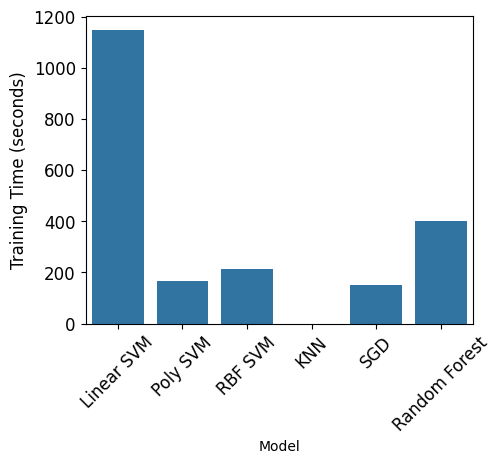

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' contains results for all models (Linear SVM, Poly SVM, RBF SVM, KNN, SGD, Random Forest)

# Bar plot of training time
plt.figure(figsize=(5, 4))
sns.barplot(x='Model', y='Training Time (s)', data=results_df)
#plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.show()

C:\Users\mase0051\AppData\Local\Temp\ipykernel_34016\2903504242.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)
C:\Users\mase0051\AppData\Local\Temp\ipykernel_34016\2903504242.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)
C:\Users\mase0051\AppData\Local\Temp\ipykernel_34016\2903504242.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)
C:\Users\mase0051\AppData\Local\Temp\ipykernel_34016\2903504242.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

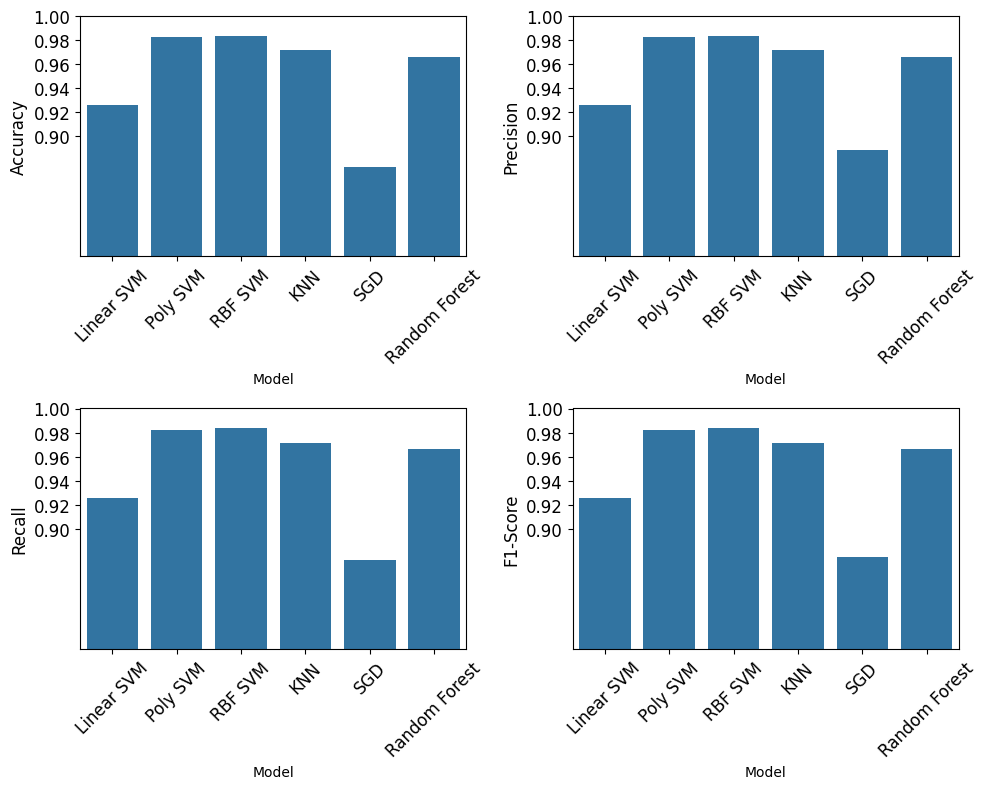

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid for the four bar plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0])
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_ylim(0.8, 1)
axes[0, 0].set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)

# Plot for Precision
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1])
axes[0, 1].set_ylabel('Precision', fontsize=12)
axes[0, 1].set_ylim(0.8, 1)
axes[0, 1].set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)

# Plot for Recall
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1, 0])
axes[1, 0].set_ylabel('Recall', fontsize=12)
axes[1, 0].set_ylim(0.8, 1)
axes[1, 0].set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)

# Plot for F1-Score
sns.barplot(x='Model', y='F1-Score', data=results_df, ax=axes[1, 1])
axes[1, 1].set_ylabel('F1-Score', fontsize=12)
axes[1, 1].set_ylim(0.8, 1)
axes[1, 1].set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45, fontsize=12)

# Make y-axis tick labels larger for all subplots
plt.setp(axes[0, 0].get_yticklabels(), fontsize=12)
plt.setp(axes[0, 1].get_yticklabels(), fontsize=12)
plt.setp(axes[1, 0].get_yticklabels(), fontsize=12)
plt.setp(axes[1, 1].get_yticklabels(), fontsize=12)


# Make x-axis tick labels larger for all subplots
plt.setp(axes[0, 0].get_xticklabels(), fontsize=12)
plt.setp(axes[0, 1].get_xticklabels(), fontsize=12)
plt.setp(axes[1, 0].get_xticklabels(), fontsize=12)
plt.setp(axes[1, 1].get_xticklabels(), fontsize=12)


# Adjust the layout to make the plots fit well
plt.tight_layout()

# Display the plots
plt.show()
